In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from math import pi, exp, cos, sin

In [2]:
def erfc(x):
    """the complementary error function"""
    I = sp.integrate(sp.exp(-t**2), (t, 0, x))
    return 1 - 2/sp.sqrt(pi) * I

In [3]:
x = sp.symbols ('x')
t = sp.symbols ('t')

V = sp.exp(-x) * erfc(x/(2*sp.sqrt(t)) - sp.sqrt(t)) - sp.exp(x) * erfc(x/(2*sp.sqrt(t)) + sp.sqrt(t))
x_domain = (0,3)
t_domain = (0.01,3)

# Calculate the values of the V on a space-time grid
V = sp.lambdify((x,t), V)
xVals = np.linspace(x_domain[0], x_domain[1], 300)
tVals = np.linspace(t_domain[0], t_domain[1], 299)
X,T = np.meshgrid(xVals, tVals)

outputs = V(X,T)

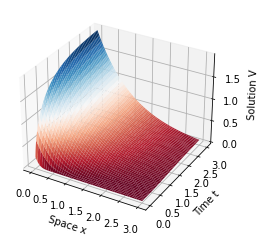

In [4]:
# Plot the surface graph
def Surface_Graph(outputs, x_domain, t_domain):
    x_vals = np.linspace(x_domain[0], x_domain[1], len(outputs[0]))
    t_vals = np.linspace(t_domain[0], t_domain[1], len(outputs))
    X,Y = np.meshgrid(x_vals,t_vals)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Space x')
    ax.set_ylabel('Time t')
    ax.set_zlabel('Solution V')
    plot = ax.plot_surface(X,Y,outputs,cmap='RdBu')
    plt.show()
    
Surface_Graph(outputs, x_domain, t_domain)

300
299


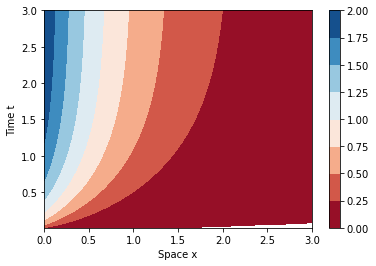

In [12]:
# Plot the contour graph
def Contour_Graph(outputs, x_domain, t_domain):
    x_vals = np.linspace(x_domain[0],x_domain[1],len(outputs[0]))
    t_vals = np.linspace(t_domain[0],t_domain[1],len(outputs))
    X,Y = np.meshgrid(x_vals,t_vals)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.contourf(X, Y, outputs, cmap='RdBu')
    ax.set_xlabel('Space x')
    ax.set_ylabel('Time t')
    plt.colorbar()
    plt.show()
Contour_Graph(outputs, x_domain, t_domain)

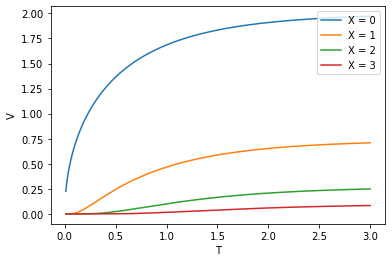

In [53]:
# Plotting solution for fixed x-slices
t = sp.symbols ('t')
t_domain = (0.01,3)
tVals = np.linspace(t_domain[0], t_domain[1], 299)

# Fix x values
xVals = [0,1,2,3]
fig = plt.figure()
ax = fig.add_subplot(111)

for x in xVals:
    V = sp.exp(-x) * erfc(x/(2*sp.sqrt(t)) - sp.sqrt(t)) - sp.exp(x) * erfc(x/(2*sp.sqrt(t)) + sp.sqrt(t))
    V = sp.lambdify(t, V)
    outputs = V(tVals)
    plot = ax.plot(tVals, outputs, label="X = " + str(x))
ax.set_xlabel("T")
ax.set_ylabel("V")
ax.legend(loc='upper right')
plt.show()